In [50]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
from dataset_generator import  DatasetGenerator
from image_utils import standardize, read_data_h5, write_data_h5, plot_images

PATH_INPUT='INPUT/'
PATH_OUTPUT='OUTPUT/'
SIZE_PATCH=120

INPUT_SIZE=9
OUTPUT_SIZE=2

In [51]:
def data_augment(input_,output_,batch_size):
    '''
    Augments the data with transformation but only select batch_size number of data
    :input_ input data
    :output_ output data
    :batch_size size of the batch
    returns input and output arrays of data augmented with transformation or with identity  
    '''
    seq = iaa.Sequential([iaa.Affine(rotate=(0, 45))])
    input_int=input_*255
    input_int.astype(int)
    data_tot=np.concatenate((input_int,output_),axis=3)
    data_tot_new=seq.augment_images(data_tot)
    input_new=data_tot_new[:,:,:,:INPUT_SIZE]
    output_new=data_tot_new[:,:,:,INPUT_SIZE:]
    
    min_t=np.amin(np.reshape(input_new,[len(input_new)*SIZE_PATCH*SIZE_PATCH,INPUT_SIZE]), axis=0)
    max_t=np.amax(np.reshape(input_new,[len(input_new)*SIZE_PATCH*SIZE_PATCH,INPUT_SIZE]), axis=0)
    input_new=(input_new-min_t)/(max_t-min_t)
    
    input_tot=np.concatenate((input_,input_new),axis=0)
    output_tot=np.concatenate((output_,output_new),axis=0)

   
    idx = np.arange(len(input_tot))
    np.random.shuffle(idx)
    input_tot=input_tot[idx]
    output_tot=output_tot[idx]
    

    return input_tot,output_tot


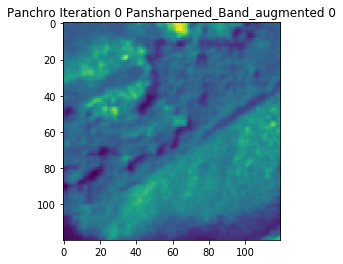

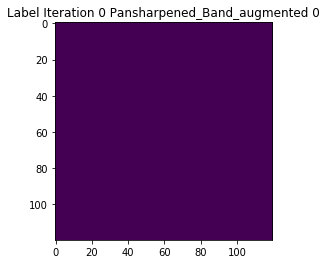

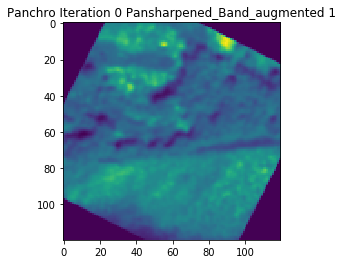

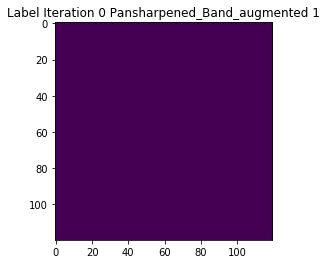

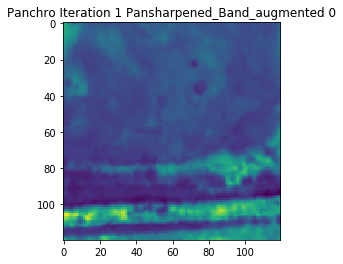

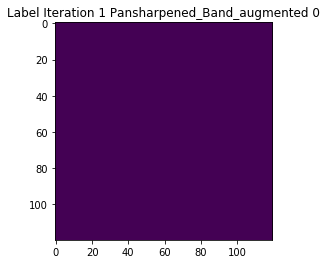

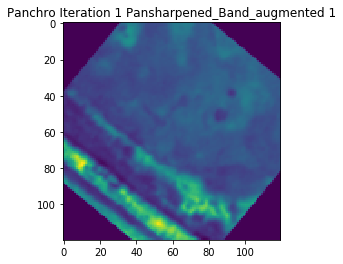

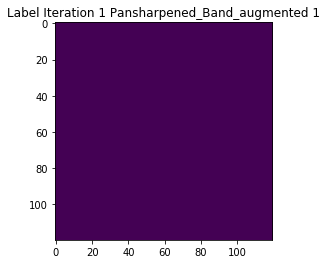

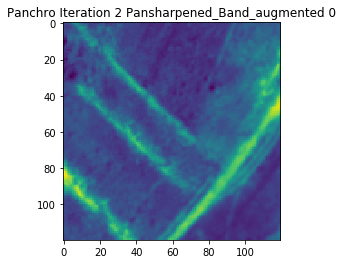

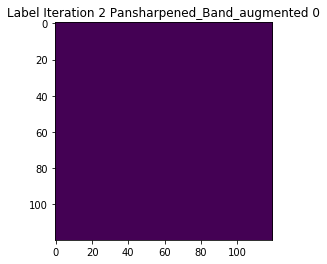

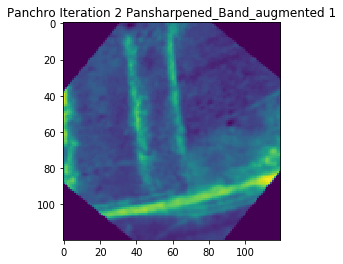

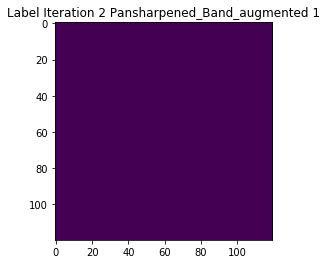

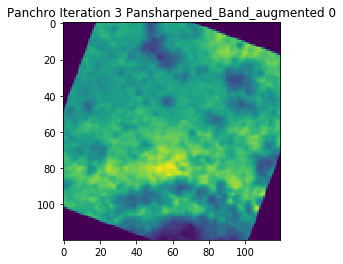

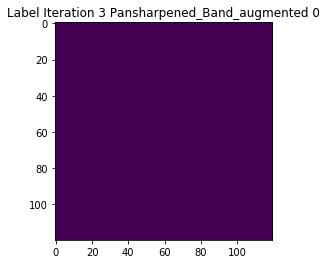

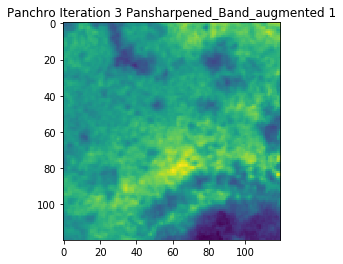

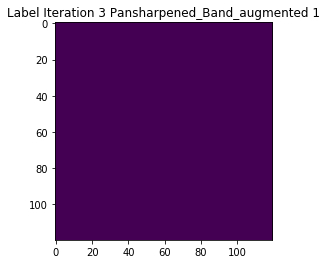

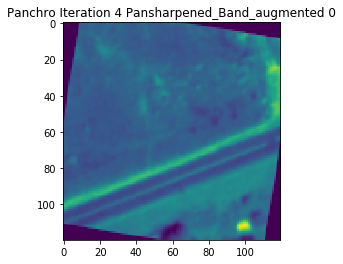

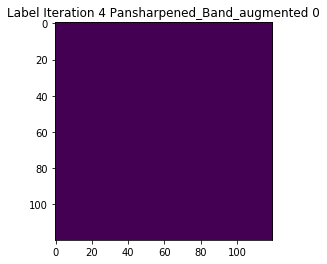

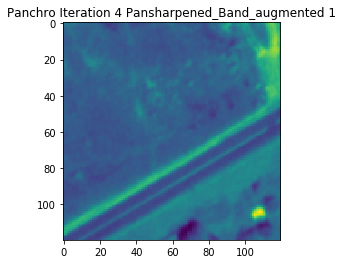

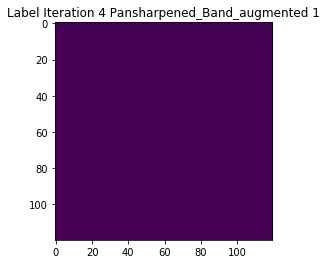

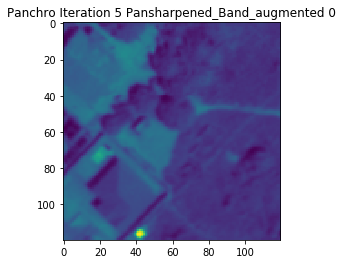

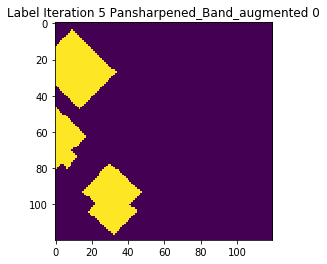

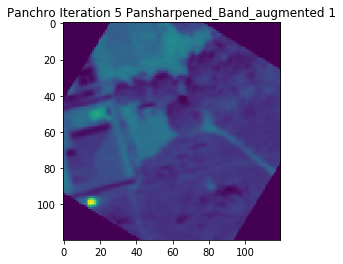

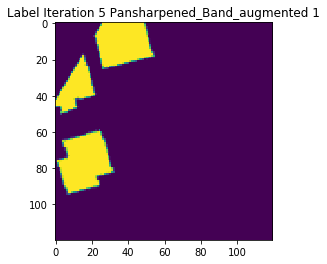

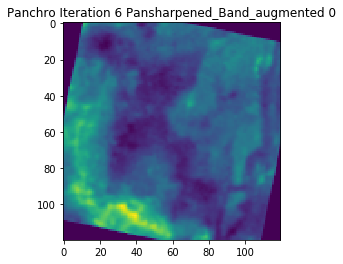

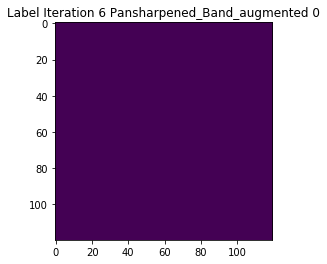

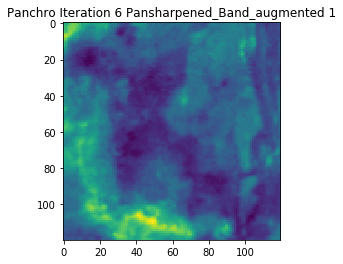

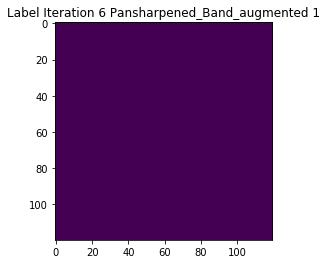

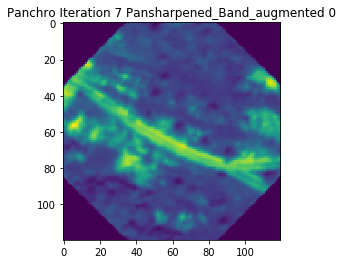

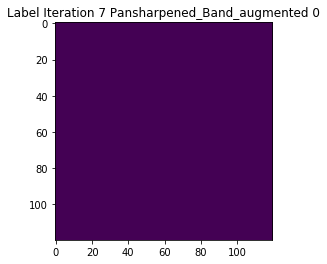

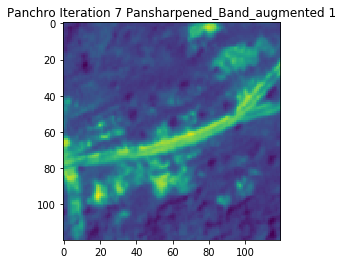

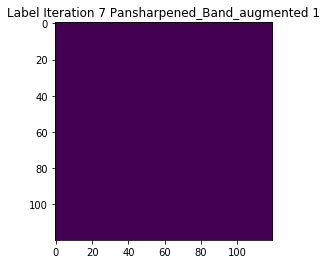

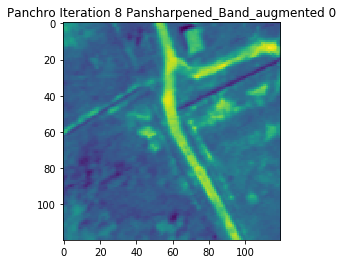

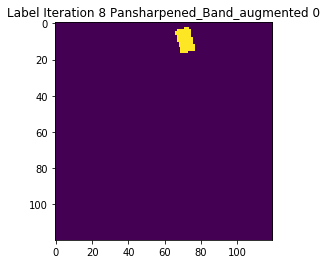

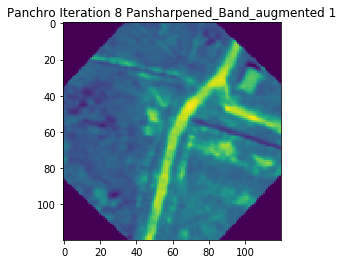

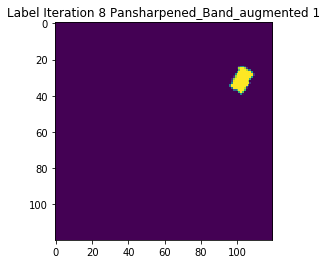

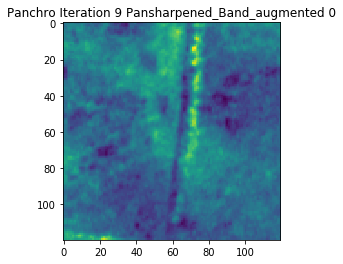

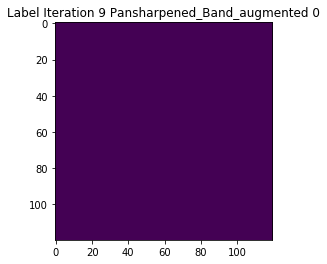

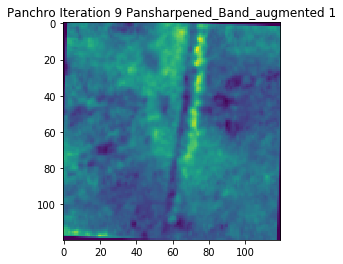

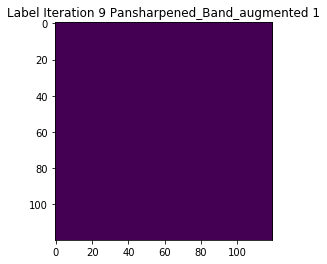

In [52]:
if __name__ == '__main__':
    
    save_folder='../DATA_GHANA/RAW_DATA/test_display/'
    root_folder = '../DATA_GHANA/DATASET/120_x_120_8_bands/TRAINING/'
    dataset_augmented='../DATA_GHANA/DATASET/120_x_120_8_bands/TRAINING_AUGMENTED/'
    if not os.path.exists(dataset_augmented):
            os.makedirs(dataset_augmented)
            
    batch_size=1
    training_generator=DatasetGenerator.from_root_folder(root_folder,batch_size=batch_size, max_data_size=10)
    
    training_generator.shuffled()
    training_generator =training_generator.__iter__()
    
    size_trainig=len(training_generator.paths_input)
    for iteration in range(size_trainig):
        X,Y =training_generator.__next__()
        X=standardize(X)
        X,Y=data_augment(X,Y,batch_size)

        for i in range(len(X)):
            plt.title('Panchro Iteration '+str(iteration)+' Pansharpened_Band_augmented '+str(i))
            plt.imshow(X[i,:,:,0])
            plt.show()
            plt.title('Label Iteration '+str(iteration)+' Pansharpened_Band_augmented '+str(i))
            plt.imshow(Y[i,:,:,0])
            plt.show()
#             write_data_h5(dataset_augmented+'INPUT/input_'+str(i)+'.h5',X)
#             write_data_h5(dataset_augmented+'OUTPUT/output_'+str(i)+'.h5',Y)
        
        